# Stochastic gradient descent
In lessons we've discussed simulated annealing and gradient descent. There is a simpler method that we can use to understand the problem, called "stochastic gradient descent". Let's apply that to a problem with a known solution and see how it does. 

Here's a simple simulated annealing example from
https://www.machinelearningplus.com/machine-learning/simulated-annealing-algorithm-explained-from-scratch-python/. You are encouraged to read this explanation of the code before continuing. 

Acceptance Criteria = 0.76232   iteration Number =  37   best_so_far =  [-0.95340594]   new_best = 0.90898
Acceptance Criteria = 0.87733   iteration Number =  39   best_so_far =  [-0.91563305]   new_best = 0.83838
Acceptance Criteria = 1.44710   iteration Number =  40   best_so_far =  [-0.85680363]   new_best = 0.73411
Acceptance Criteria = 1.42798   iteration Number =  41   best_so_far =  [-0.8221177]   new_best = 0.67588
Acceptance Criteria = 1.22608   iteration Number =  42   best_so_far =  [-0.68541443]   new_best = 0.46979
Acceptance Criteria = 2.09273   iteration Number =  43   best_so_far =  [-0.61804282]   new_best = 0.38198
Acceptance Criteria = 1.16478   iteration Number =  50   best_so_far =  [-0.42564785]   new_best = 0.18118
Acceptance Criteria = 0.81414   iteration Number =  66   best_so_far =  [-0.35632231]   new_best = 0.12697
Acceptance Criteria = 1.74595   iteration Number =  67   best_so_far =  [-0.33780667]   new_best = 0.11411
Acceptance Criteria = 1.02155   iterat

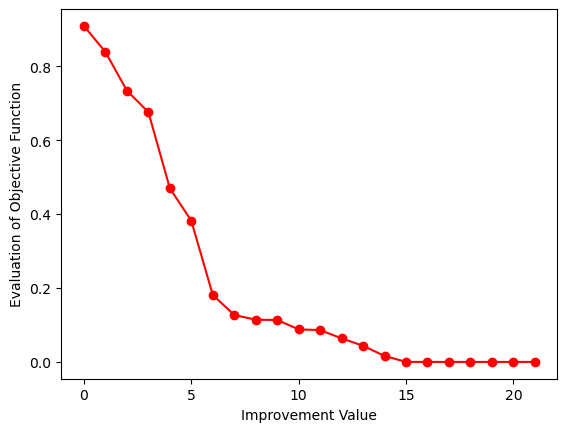

In [1]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

# Define objective function
def objective(step):
    return step[0] ** 2.0

# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    # initialize acceptance criteria
    t = temperature / float(1)
    difference = 0
    # calculate Metropolis Acceptance Criterion / Acceptance Probability
    mac = exp(-difference / t)
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        # check whether the new point is acceptable 
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]

seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)
#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

__Question 1:__ What function is this example trying to minimize? 

*Your answer:* A quadratic function

__Question 2:__ Although this is stated to be simulated annealing, It's not quite the form that we discussed. What are the differences?

*Your answer:* For the cooling schedule, most gradient descent models use a static rate whereas here we are dividing by the number of steps plus 1, so the rate is incresing with each step.

__Question 3:__ What happens if the function doesn't have a minimum in the range? (Hint: Try y=x<sup>3</sup>). 

Acceptance Criteria = 1.00000   iteration Number =  0   best_so_far =  [-1.07595323]   new_best = -1.24560
Acceptance Criteria = 1.02176   iteration Number =  1   best_so_far =  [-1.12084101]   new_best = -1.40810
Acceptance Criteria = 1.02745   iteration Number =  2   best_so_far =  [-1.23143452]   new_best = -1.86739
Acceptance Criteria = 1.12167   iteration Number =  3   best_so_far =  [-1.39688606]   new_best = -2.72573
Acceptance Criteria = 1.33125   iteration Number =  4   best_so_far =  [-1.63323292]   new_best = -4.35657
Acceptance Criteria = 1.13871   iteration Number =  8   best_so_far =  [-1.71225671]   new_best = -5.02003
Acceptance Criteria = 0.31056   iteration Number =  10   best_so_far =  [-1.74449843]   new_best = -5.30899
Acceptance Criteria = 1.30327   iteration Number =  11   best_so_far =  [-1.78290387]   new_best = -5.66740
Acceptance Criteria = 0.33341   iteration Number =  13   best_so_far =  [-1.89289299]   new_best = -6.78232
Acceptance Criteria = 0.49797   it

/var/folders/x5/1s3v6d396ln_zjlvf2v_gzh00000gn/T/ipykernel_32519/3480012987.py:37: RuntimeWarning: overflow encountered in exp
  mac = exp(-difference / t)


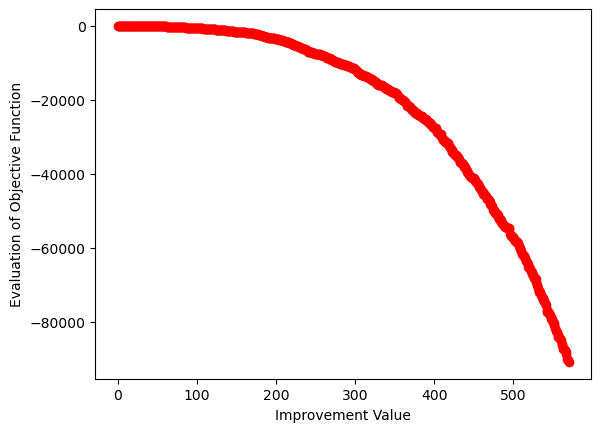

In [2]:
# Copy the code here and substitute a different objective function, 
# and modify the code if needed. Then run it. 
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

# Define objective function
def objective(step):
    return step[0] ** 3.0

# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    # initialize acceptance criteria
    t = temperature / float(1)
    difference = 0
    # calculate Metropolis Acceptance Criterion / Acceptance Probability
    mac = exp(-difference / t)
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        # check whether the new point is acceptable 
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]

seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)
#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

*Your answer to the question:* The y ranges from 0 down to -80,000 and onwards, and magnitude of the slope increases in the negative (i.e. decreasing more and more).

__Question 4:__ Adjust the code above to minimize the objective function $x^2 + y^2 + 2$.

Acceptance Criteria = 1.00000   iteration Number =  0   best_so_far =  [-1.04855312  2.53659706]   new_best = 9.53379
Acceptance Criteria = 1.03803   iteration Number =  1   best_so_far =  [-0.96201236  2.30644319]   new_best = 8.24515
Acceptance Criteria = 1.23958   iteration Number =  2   best_so_far =  [-0.78753118  2.2303225 ]   new_best = 7.59454
Acceptance Criteria = 1.17663   iteration Number =  3   best_so_far =  [-0.75562727  2.20538546]   new_best = 7.43470
Acceptance Criteria = 1.05473   iteration Number =  4   best_so_far =  [-0.60941648  1.99937139]   new_best = 6.36887
Acceptance Criteria = 1.55908   iteration Number =  5   best_so_far =  [-0.6416582   1.96096596]   new_best = 6.25711
Acceptance Criteria = 1.05747   iteration Number =  6   best_so_far =  [-0.52828125  1.85097683]   new_best = 5.70520
Acceptance Criteria = 1.37982   iteration Number =  7   best_so_far =  [-0.54552407  1.76319099]   new_best = 5.40644
Acceptance Criteria = 0.85792   iteration Number =  9   

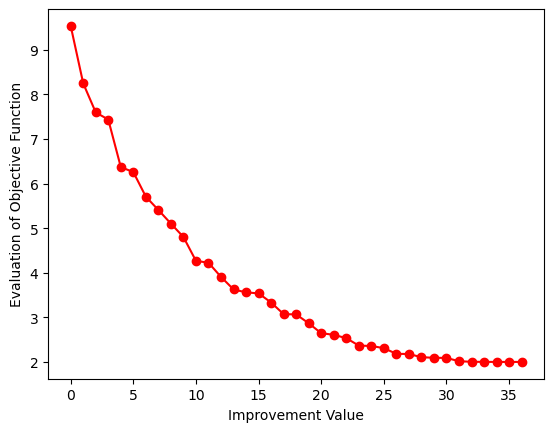

In [15]:
# Copy the code here and substitute the different objective function 
# and modify the code if needed. Then run it. 
# Copy the code here and substitute a different objective function, 
# and modify the code if needed. Then run it. 
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

# Define objective function
def objective(step):
    return step[0]**2 + step[1]**2 + 2

# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    # initialize acceptance criteria
    t = temperature / float(1)
    difference = 0
    # calculate Metropolis Acceptance Criterion / Acceptance Probability
    mac = exp(-difference / t)
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        # check whether the new point is acceptable 
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]

seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0], [-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)
#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

__Question 5:__ Visualize the trajectory of the solution over time -- in two dimensions -- using either MatPlotLib or Seaborn. 

Acceptance Criteria = 1.00000   iteration Number =  0   best_so_far =  [-1.04855312  2.53659706]   new_best = 9.53379
Acceptance Criteria = 1.03803   iteration Number =  1   best_so_far =  [-0.96201236  2.30644319]   new_best = 8.24515
Acceptance Criteria = 1.23958   iteration Number =  2   best_so_far =  [-0.78753118  2.2303225 ]   new_best = 7.59454
Acceptance Criteria = 1.17663   iteration Number =  3   best_so_far =  [-0.75562727  2.20538546]   new_best = 7.43470
Acceptance Criteria = 1.05473   iteration Number =  4   best_so_far =  [-0.60941648  1.99937139]   new_best = 6.36887
Acceptance Criteria = 1.55908   iteration Number =  5   best_so_far =  [-0.6416582   1.96096596]   new_best = 6.25711
Acceptance Criteria = 1.05747   iteration Number =  6   best_so_far =  [-0.52828125  1.85097683]   new_best = 5.70520
Acceptance Criteria = 1.37982   iteration Number =  7   best_so_far =  [-0.54552407  1.76319099]   new_best = 5.40644
Acceptance Criteria = 0.85792   iteration Number =  9   

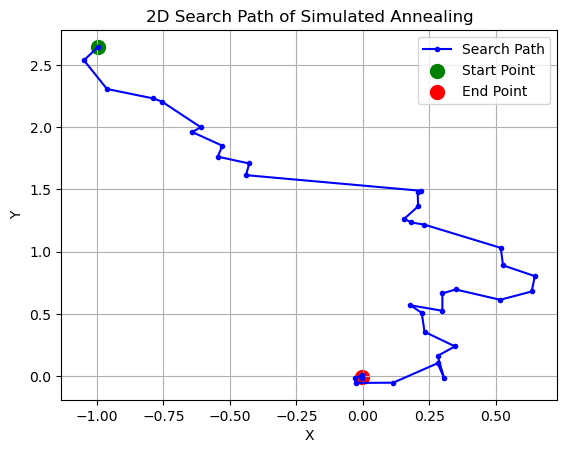

In [22]:
# Copy the code here and modify as necessary, then run it. 
# Copy the code here and substitute the different objective function 
# and modify the code if needed. Then run it. 
# Copy the code here and substitute a different objective function, 
# and modify the code if needed. Then run it. 
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

# Define objective function
def objective(step):
    return step[0]**2 + step[1]**2 + 2

# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = [start_point_eval]
    path = [start_point]  # Store the path of points
    # initialize acceptance criteria
    t = temperature / float(1)
    difference = 0
    # calculate Metropolis Acceptance Criterion / Acceptance Probability
    mac = exp(-difference / t)
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            path.append(start_point)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        # check whether the new point is acceptable 
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs, path]

seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0], [-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs, path = sa(objective, area, iterations, step_size, temperature)

#Separate the path for x and y 
x_points = [p[0] for p in path]
y_points = [p[1] for p in path]

#plotting the values
pyplot.plot(x_points, y_points, "bo-", markersize=3, label="Search Path")
pyplot.scatter(x_points[0], y_points[0], color="green", label="Start Point", s=100)
pyplot.scatter(x_points[-1], y_points[-1], color="red", label="End Point", s=100)
pyplot.xlabel("X")
pyplot.ylabel("Y")
pyplot.title("2D Search Path of Simulated Annealing")
pyplot.legend()
pyplot.grid(True)
pyplot.show()